In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Kmeans:
    def __init__(self, k_means=5, tolerance=1e-05, n_iter=100, visualize=True):
        self.k = k_means
        self.n_iter = n_iter
        self.visualize = visualize
        self.tolerance = tolerance
        
        self.clusters = { index:[] for index in range(self.k) }
        
        self.centroids = []
        
    
    def predict(self, X):
        self.X = X
        n_samples, n_features = X.shape
        initial_centroids_indices = np.random.choice(n_samples, self.k, replace=False)
        self.centroids = [self.X[index] for index in initial_centroids_indices]
        
        for _ in range(self.n_iter):
            self.clusters = self._create_clusters(self.X, self.k, self.centroids)
            
            old_centroids = self.centroids
            self.centroids = self._update_centroids(self.X, self.k, n_features, self.clusters)
            
            if self._has_converged(old_centroids, self.centroids, self.k, self.tolerance):
                break
                
        if self.visualize:
            self._plot_clusters(self.X, self.clusters, self.centroids)
                
        return self._populate_labels(n_samples, self.clusters) 
            
            
    def _create_clusters(self, X, k, centroids):
        clusters = { index:[] for index in range(k) }
        
        for i, x_i in enumerate(X):
            centroid_index = self._closest_centroid(x_i, centroids)
            clusters[centroid_index].append(i)
        
        return clusters
    
    
    def _closest_centroid(self, point, centroids):
        distances = [ self._eculidean_distance(centroid, point) for centroid in centroids ]
        closest_centroid_index = np.argmin(distances)
        
        return closest_centroid_index
    
    
    def _update_centroids(self, X, k, n_features, previous_clusters):
        centroids = np.zeros((k, n_features))
        for key_index, cluster in previous_clusters.items():
            centroid_mean = np.mean(X[cluster], axis=0)
            centroids[key_index] = centroid_mean
        
        return centroids
            
            
    def _has_converged(self, old_centroids, new_centroids, k, tolerance):
        distances = [ self._eculidean_distance(old_centroids[i], new_centroids[i]) for i in range(k) ]
        return np.sum(distances) <= tolerance
        
    
    def _eculidean_distance(self, point_1, point_2):
        return np.sqrt( np.sum( (point_1 - point_2)**2 ) )
    
    
    def _populate_labels(self, labels_size, clusters):
        labels = np.empty(labels_size)
        
        for key_index, cluster in clusters.items():
            for x_i in cluster:
                labels[x_i] = key_index
                
        return labels
    
    
    def _plot_clusters(self, X, clusters, centroids):
        fig, ax = plt.subplots(figsize=(12, 8))
        
        for key_index, cluster in clusters.items():
            points = X[cluster].T
            ax.scatter(*points)
            
        for centroid in centroids:
            points = centroids.T
            ax.scatter(*points, marker='x', color='black', linewidth=2)

In [3]:
from sklearn.datasets import make_blobs

In [4]:
X, y = make_blobs(centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40)

In [5]:
clusters = len(np.unique(y))

In [6]:
k_means = Kmeans(k_means=clusters, n_iter=200)

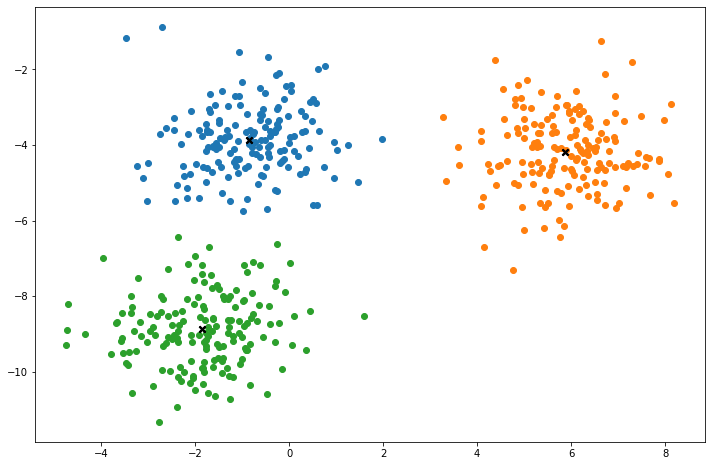

In [7]:
y_predicted = k_means.predict(X)